In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [ ]:
#Getting region 463-478 for DIFF BUM HMM OUTPUT 
df_diff_bumhmm_output = pd.read_csv('C:/Users/maran/Desktop/diff_BUM_HMM_Project/Github/diff_BUM_HMM/35S_diffBUM_HMM_WT_vs_Erb1_diff_BUM_HMM_analysed.txt', sep="\t", header=0)
df_diff_bumhmm_output = df_diff_bumhmm_output.iloc [462:478, 1:3]

#df_diff_bumhmm_output= df_diff_bumhmm_output.iloc[0:10, :]

df_diff_bumhmm_output.head

In [ ]:
#Getting region 270-355 FOR dStruct analysis

df_pea_output = pd.read_csv('C:/Users/maran/Desktop/diff_BUM_HMM_Project/Github/diff_BUM_HMM/output_dStruct_35S.txt', sep="\t", header=0)
df_pea_output = df_pea_output.iloc[462:478, 1:3]
df_pea_output= df_pea_output.rename_axis('positions').reset_index()
#df_pea_output = df_pea_output.iloc[0:10, :]
df_pea_output.head


In [ ]:
new_df = df_pea_output.set_index('positions').join(df_diff_bumhmm_output)
new_df.head

In [ ]:
#THRESHOLDING DIFF BUM HMM OUTPUT
new_df['UM'] = [0 if x<0.95 else x for x in new_df['UM']]
new_df['MU'] = [0 if x<0.95 else x for x in new_df['MU']]

In [ ]:
#print(new_df.columns)
new_df = new_df[['MU', 'UM','A2','B1']]
#print(new_df.columns)

new_df.columns = ['more flexible in delta5 - DIFF BUM HMM', 'more flexible in Erb1 - DIFF BUM HMM','delta5 - dStruct', 'Erb1 - dStruct'  ]
#print(new_df.columns)

In [ ]:
with open('C:/Users/maran/Desktop/diff_BUM_HMM_Project/Github/diff_BUM_HMM/Reference sequences/35S pre-rRNA_refseq.seq', 'r') as file:
    ref_sequence = file.read().replace('\n', '')

subsequence= []
for i in ref_sequence[462:478]: 
    subsequence.append(i)
    
new_df.insert(loc=4, column='nucleotide', value=subsequence)



In [ ]:
from matplotlib.ticker import LinearLocator

fig,ax = plt.subplots(4,sharex=True,figsize=[40,10])
x = new_df.index

for i in range(4):
    print(i)
    if i == 0:
        ax[i].get_yaxis().set_major_locator(LinearLocator(numticks=5))
        column = new_df.columns[i]
        y = new_df[column]
        ax[i].bar(x,y)
        ax[i].set_xticklabels(x,fontsize=16)
        miny = 0
        maxy = 1
        yticks = np.arange(miny,maxy+1,0.25)
        ax[i].set_yticklabels(yticks,fontsize=16)
        xticks = np.arange(min(x),max(x)+1)
        ax[i].set_xticks(xticks)
        nucleotides = new_df['nucleotide']
        ax[i].set_xticklabels(nucleotides)
        ax[i].legend([column], fontsize=15)
        ax[i].set_ylabel('diffBUM-HMM posterior probability', rotation=0, fontsize=20, labelpad=160)
    
    elif i == 1:
        ax[i].get_yaxis().set_major_locator(LinearLocator(numticks=5))
        column = new_df.columns[i]
        y = new_df[column]
        ax[i].bar(x,y)
        ax[i].set_xticklabels(x,fontsize=16)
        miny = 0
        maxy = 1
        yticks = np.arange(miny,maxy+1,0.25)
        ax[i].set_yticklabels(yticks,fontsize=16)
        xticks = np.arange(min(x),max(x)+1)
        ax[i].set_xticks(xticks)
        nucleotides = new_df['nucleotide']
        ax[i].set_xticklabels(nucleotides)
        ax[i].legend([column], fontsize=15)
        ax[i].set_ylabel('diffBUM-HMM posterior probability', rotation=0, fontsize=20, labelpad=160)
        
    elif i == 2:
        ax[i].get_yaxis().set_major_locator(LinearLocator(numticks=5))
        column = new_df.columns[i]
        y = new_df[column]
        ax[i].bar(x,y)
        ax[i].set_xticklabels(x,fontsize=16)
        #miny = 0
        #maxy = 1.85
        #yticks = np.arange(miny,maxy+1,0.25)
        yticks = [0.0, 0.45,0.90,1.35,1.80]
        ax[i].set_yticklabels(yticks,fontsize=16)
        xticks = np.arange(min(x),max(x)+1)
        ax[i].set_xticks(xticks)
        nucleotides = new_df['nucleotide']
        ax[i].set_xticklabels(nucleotides)
        ax[i].legend([column], fontsize=15)
        ax[i].set_ylabel('dStruct reactivity', rotation=0, fontsize=20, labelpad=100)
    
    elif i == 3:
        ax[i].get_yaxis().set_major_locator(LinearLocator(numticks=5))
        column = new_df.columns[i]
        y = new_df[column]
        ax[i].bar(x,y)
        ax[i].set_xticklabels(x,fontsize=16)
        #miny = 0
        #maxy = 2
        #yticks = np.arange(miny,maxy+1,0.5)
        yticks = [0.0, 0.35,0.70,1.05,1.40]
        ax[i].set_yticklabels(yticks,fontsize=16)
        xticks = np.arange(min(x),max(x)+1)
        ax[i].set_xticks(xticks)
        nucleotides = new_df['nucleotide']
        ax[i].set_xticklabels(nucleotides)
        ax[i].legend([column], fontsize=15)
        ax[i].set_ylabel('dStruct reactivity', rotation=0, fontsize=20, labelpad=100)
        ax[i].set_xlabel('Nucleotide (positions 463-478)', fontsize=20)


fig.savefig("diff_BUM_HMM_vs_dStruct_plot_463_478.pdf",dpi=400)   

In [2]:
#Getting region 2453-2463 for DIFF BUM HMM OUTPUT 
df_diff_bumhmm_output = pd.read_csv('C:/Users/maran/Desktop/diff_BUM_HMM_Project/Github/diff_BUM_HMM/35S_diffBUM_HMM_WT_vs_Erb1_diff_BUM_HMM_analysed.txt', sep="\t", header=0)
df_diff_bumhmm_output = df_diff_bumhmm_output.iloc [2452:2463, 1:3]

#df_diff_bumhmm_output= df_diff_bumhmm_output.iloc[0:10, :]

df_diff_bumhmm_output.head

<bound method NDFrame.head of                 UM            MU
2453  9.999985e-01  5.338122e-13
2454  2.250831e-05  1.282069e-09
2455  2.012784e-09  7.422770e-10
2456  1.197916e-07  5.587280e-08
2457  7.743780e-14  4.157008e-58
2458  1.373164e-02  1.417819e-07
2459  9.999996e-01  8.062083e-15
2460  9.999998e-01  1.526688e-15
2461  5.534128e-01  1.522266e-08
2462  9.534635e-01  3.689236e-07
2463  2.879200e-01  1.662452e-15>

In [3]:
#Getting region 2453-2463 FOR dStruct analysis

df_pea_output = pd.read_csv('C:/Users/maran/Desktop/diff_BUM_HMM_Project/Github/diff_BUM_HMM/output_dStruct_35S.txt', sep="\t", header=0)
df_pea_output = df_pea_output.iloc[2452:2463, 1:3]
df_pea_output= df_pea_output.rename_axis('positions').reset_index()
#df_pea_output = df_pea_output.iloc[0:10, :]
df_pea_output.head


<bound method NDFrame.head of     positions        A2        B1
0        2453  0.064586  0.651792
1        2454  0.502840  2.784255
2        2455  0.705714  2.658357
3        2456  0.556058  2.236010
4        2457  0.000000  0.382789
5        2458  0.196682  0.964443
6        2459  0.152811  1.638087
7        2460  0.526702  2.830499
8        2461  1.778731  3.973530
9        2462  1.535468  2.198137
10       2463  0.175083  0.709611>

In [4]:
new_df = df_pea_output.set_index('positions').join(df_diff_bumhmm_output)
new_df.head

<bound method NDFrame.head of                  A2        B1            UM            MU
positions                                                
2453       0.064586  0.651792  9.999985e-01  5.338122e-13
2454       0.502840  2.784255  2.250831e-05  1.282069e-09
2455       0.705714  2.658357  2.012784e-09  7.422770e-10
2456       0.556058  2.236010  1.197916e-07  5.587280e-08
2457       0.000000  0.382789  7.743780e-14  4.157008e-58
2458       0.196682  0.964443  1.373164e-02  1.417819e-07
2459       0.152811  1.638087  9.999996e-01  8.062083e-15
2460       0.526702  2.830499  9.999998e-01  1.526688e-15
2461       1.778731  3.973530  5.534128e-01  1.522266e-08
2462       1.535468  2.198137  9.534635e-01  3.689236e-07
2463       0.175083  0.709611  2.879200e-01  1.662452e-15>

In [5]:
#THRESHOLDING DIFF BUM HMM OUTPUT
new_df['UM'] = [0 if x<0.95 else x for x in new_df['UM']]
new_df['MU'] = [0 if x<0.95 else x for x in new_df['MU']]

In [6]:
#print(new_df.columns)
new_df = new_df[['MU', 'UM','A2','B1']]
#print(new_df.columns)

new_df.columns = ['more flexible in delta5 - DIFF BUM HMM', 'more flexible in Erb1 - DIFF BUM HMM','delta5 - dStruct', 'Erb1 - dStruct'  ]
#print(new_df.columns)

In [7]:
with open('C:/Users/maran/Desktop/diff_BUM_HMM_Project/Github/diff_BUM_HMM/Reference sequences/35S pre-rRNA_refseq.seq', 'r') as file:
    ref_sequence = file.read().replace('\n', '')

subsequence= []
for i in ref_sequence[2452:2463]: 
    subsequence.append(i)
    
new_df.insert(loc=4, column='nucleotide', value=subsequence)



0
1
2
3


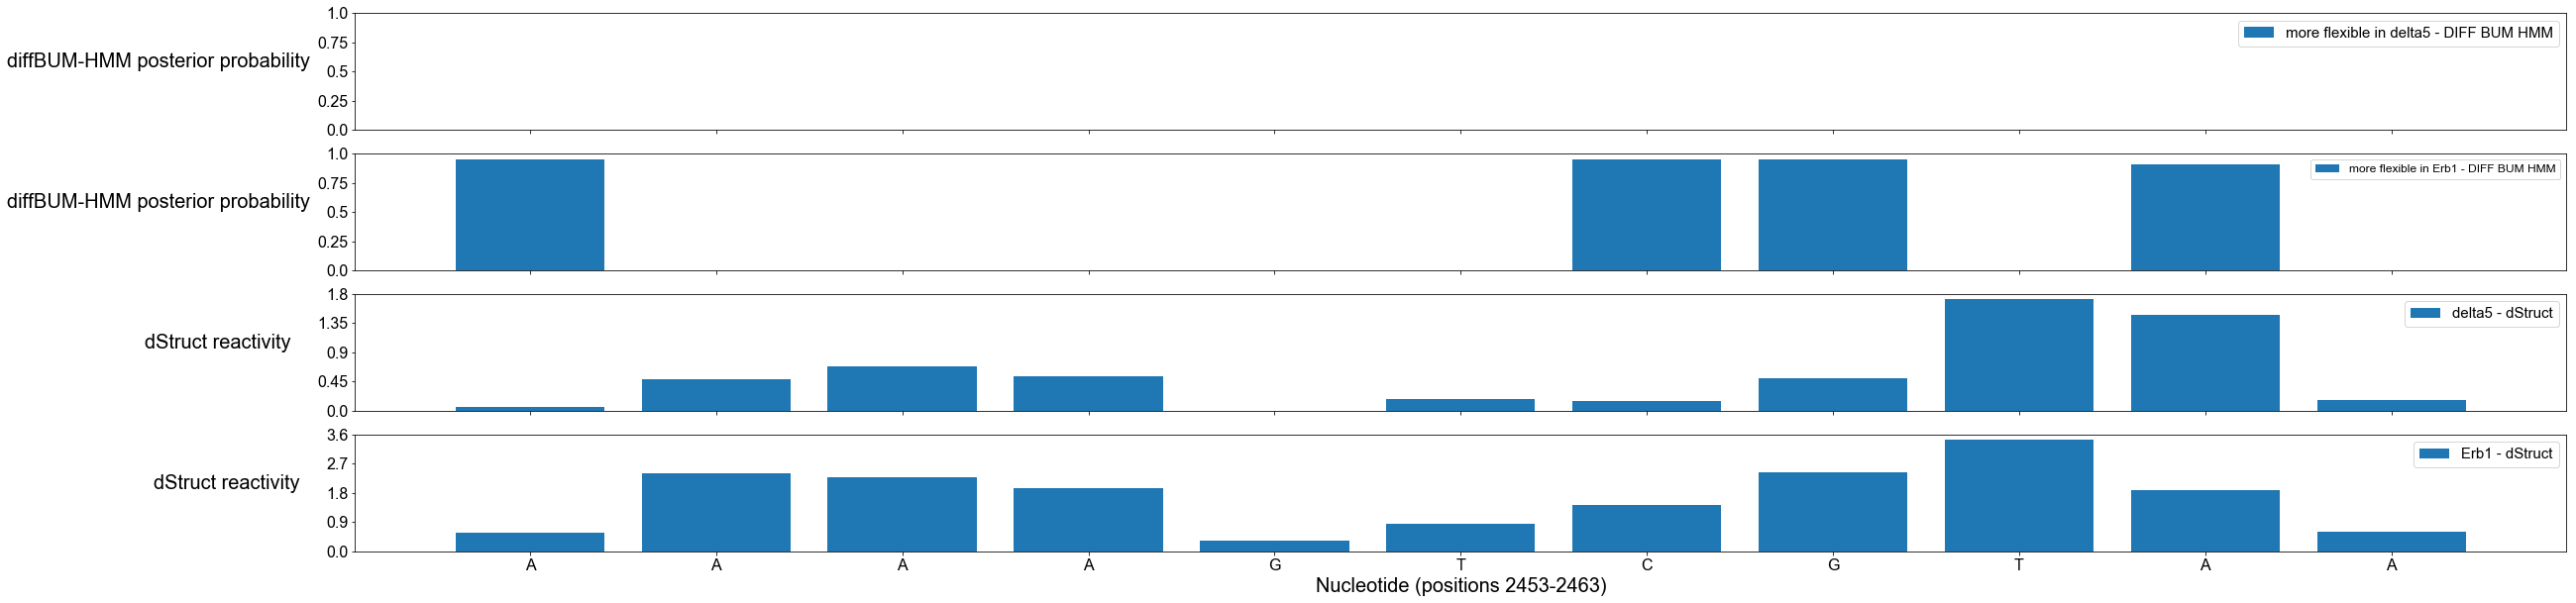

In [15]:
from matplotlib.ticker import LinearLocator

fig,ax = plt.subplots(4,sharex=True,figsize=[40,10])
x = new_df.index

for i in range(4):
    print(i)
    if i == 0:
        ax[i].get_yaxis().set_major_locator(LinearLocator(numticks=5))
        column = new_df.columns[i]
        y = new_df[column]
        ax[i].bar(x,y)
        ax[i].set_xticklabels(x,fontsize=16)
        miny = 0
        maxy = 1
        yticks = np.arange(miny,maxy+1,0.25)
        ax[i].set_yticklabels(yticks,fontsize=16)
        xticks = np.arange(min(x),max(x)+1)
        ax[i].set_xticks(xticks)
        nucleotides = new_df['nucleotide']
        ax[i].set_xticklabels(nucleotides)
        ax[i].legend([column], fontsize=15)
        ax[i].set_ylabel('diffBUM-HMM posterior probability', rotation=0, fontsize=20, labelpad=160)
    
    elif i == 1:
        ax[i].get_yaxis().set_major_locator(LinearLocator(numticks=5))
        column = new_df.columns[i]
        y = new_df[column]
        ax[i].bar(x,y)
        ax[i].set_xticklabels(x,fontsize=16)
        miny = 0
        maxy = 1
        yticks = np.arange(miny,maxy+1,0.25)
        ax[i].set_yticklabels(yticks,fontsize=16)
        xticks = np.arange(min(x),max(x)+1)
        ax[i].set_xticks(xticks)
        nucleotides = new_df['nucleotide']
        ax[i].set_xticklabels(nucleotides)
        ax[i].legend([column], fontsize=12)
        ax[i].set_ylabel('diffBUM-HMM posterior probability', rotation=0, fontsize=20, labelpad=160)
        
    elif i == 2:
        ax[i].get_yaxis().set_major_locator(LinearLocator(numticks=5))
        column = new_df.columns[i]
        y = new_df[column]
        ax[i].bar(x,y)
        ax[i].set_xticklabels(x,fontsize=16)
        #miny = 0
        #maxy = 1.85
        #yticks = np.arange(miny,maxy+1,0.25)
        yticks = [0.0, 0.45,0.90,1.35,1.80]
        ax[i].set_yticklabels(yticks,fontsize=16)
        xticks = np.arange(min(x),max(x)+1)
        ax[i].set_xticks(xticks)
        nucleotides = new_df['nucleotide']
        ax[i].set_xticklabels(nucleotides)
        ax[i].legend([column], fontsize=15)
        ax[i].set_ylabel('dStruct reactivity', rotation=0, fontsize=20, labelpad=100)
    
    elif i == 3:
        ax[i].get_yaxis().set_major_locator(LinearLocator(numticks=5))
        column = new_df.columns[i]
        y = new_df[column]
        ax[i].bar(x,y)
        ax[i].set_xticklabels(x,fontsize=16)
        #miny = 0
        #maxy = 2
        #yticks = np.arange(miny,maxy+1,0.5)
        yticks = [0.0, 0.9,1.8,2.7,3.60]
        ax[i].set_yticklabels(yticks,fontsize=16)
        xticks = np.arange(min(x),max(x)+1)
        ax[i].set_xticks(xticks)
        nucleotides = new_df['nucleotide']
        ax[i].set_xticklabels(nucleotides)
        ax[i].legend([column], fontsize=15)
        ax[i].set_ylabel('dStruct reactivity', rotation=0, fontsize=20, labelpad=100)
        ax[i].set_xlabel('Nucleotide (positions 2453-2463)', fontsize=20)


fig.savefig("diff_BUM_HMM_vs_dStruct_plot_2453_2463.pdf",dpi=400)   